<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ComputerVisionTutorial8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Image Alignment</h3>

## Align an image to a template.
![alt text](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_image-alignment-using-opencv.jpg "Image Alignment")

## Theory

1. A **Homography** transforms a square to arbitrary quad.

![alt text](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_motion-models.jpg "Motion Models")

## Theory

2. Images of two planes are related by a **Homography**
3. We need **4 corresponding points** to estimate Homography


!["Homography Example"](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_homography-example.jpg)

In [3]:
#importing required packages
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Reading Template & Scanned Image

In [4]:
#reference image
refrence_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/form.jpg", cv.IMREAD_COLOR)
refrence_img_rgb = cv.cvtColor(refrence_img, cv.COLOR_BGR2RGB)

#scanned image
scan_image = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/scanned-form.jpg", cv.IMREAD_COLOR)
scan_image_rgb = cv.cvtColor(scan_image, cv.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Scanned Image')

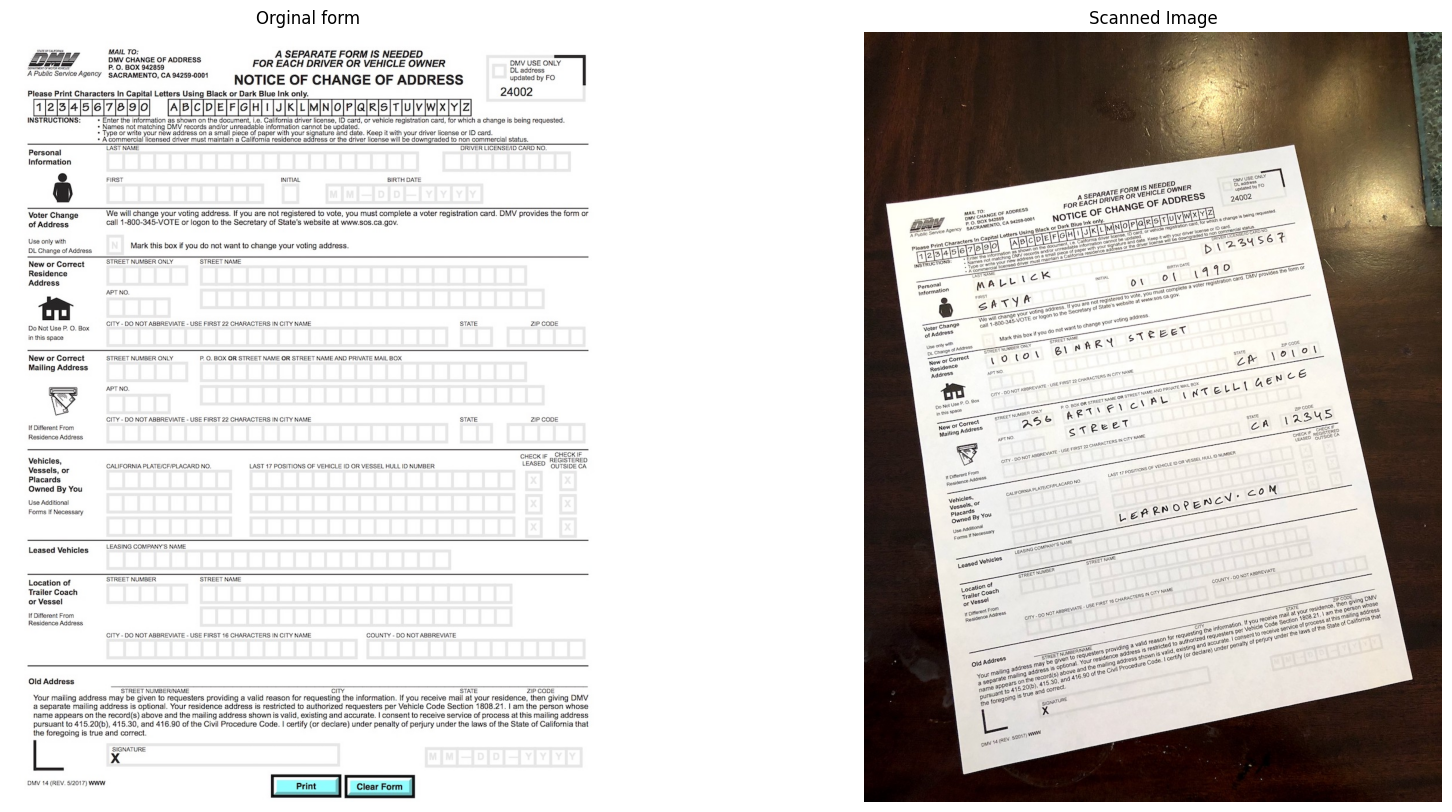

In [5]:
#display images
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.axis('off');plt.imshow(refrence_img_rgb);plt.title("Orginal form")
plt.subplot(122);plt.axis('off');plt.imshow(scan_image_rgb);plt.title("Scanned Image")

#Step 2: Find keypoints in both Images
<p>Think of keypoints as corner points that are stable under image transformations</p>

In [6]:
#convert images to grayscale
ref_img_gray = cv.cvtColor(refrence_img, cv.COLOR_BGR2GRAY)
scan_img_gray = cv.cvtColor(scan_image, cv.COLOR_BGR2GRAY)

##Next step to detect ORB
<p>ORB is used to detect keypoints in fastest way</p>

In [7]:
#detecting ORB features
MAX_NUM_FEATURES = 500 #setting the maximum no
orb = cv.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(ref_img_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(scan_img_gray, None)

<p>In the above code we are converting the images into grayscale, then we are going to find keypoints using <b>ORB</b> detector,<br>next we need to mark the keypoints by circling it</p>

In [8]:
#marking key-points
ref_img_display = cv.drawKeypoints(refrence_img_rgb, keypoints1, outImage=np.array([]),
                                   color=(255, 0, 0),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scan_img_display = cv.drawKeypoints(scan_image_rgb, keypoints2, outImage=np.array([]),
                                    color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Scan Image')

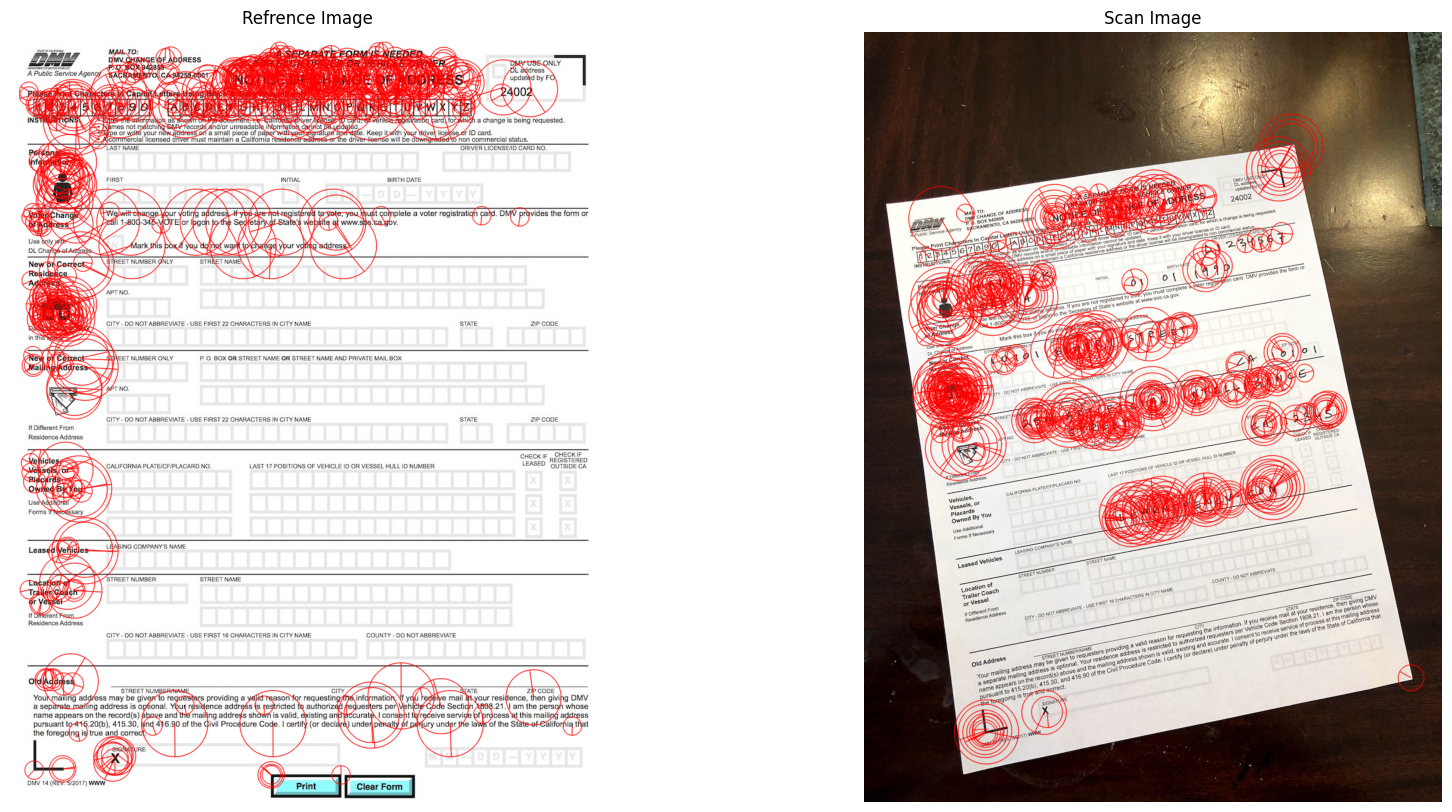

In [9]:
#displaying the image
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.axis('off');plt.imshow(ref_img_display);plt.title("Refrence Image")
plt.subplot(122);plt.axis('off');plt.imshow(scan_img_display);plt.title("Scan Image")

<p>so we find the keypoints next step is we want to match the keypoints</p>

#Step 3: Match keypoints in 2 image

In [10]:
#matching the images
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

#converting to list for sorting as tuples becoz tuple is a immutable object
matches = list(matcher.match(descriptors1, descriptors2, None))

#sorting matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

#removing not so good matches
numofgoodmatches = int(len(matches)*0.1)
print(numofgoodmatches)
matches = matches[:numofgoodmatches]

50


<p>so we find the good matches from the keypoints, next we need to draw the matches</p>

Text(0.5, 1.0, 'Key Point Matches')

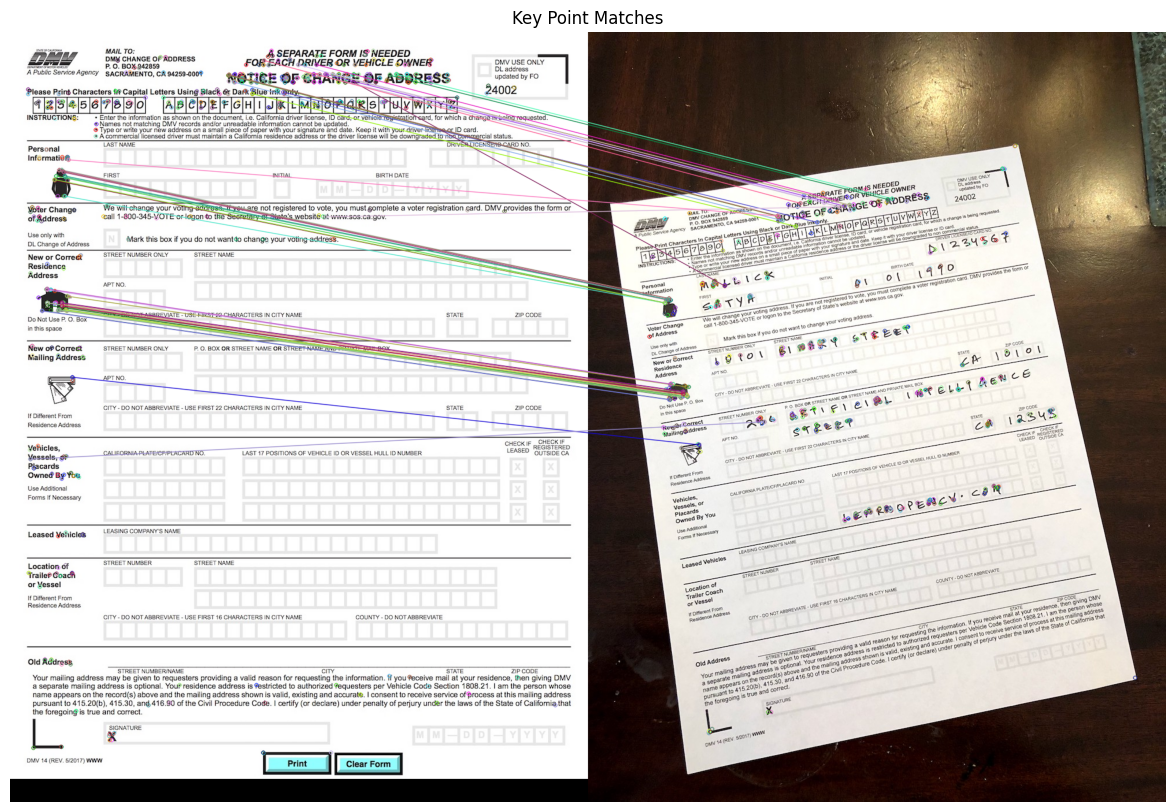

In [11]:
#drawing top matches
img_matches = cv.drawMatches(refrence_img_rgb, keypoints1, scan_image_rgb, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(img_matches);plt.axis("off");plt.title("Key Point Matches")

#Find Homography
after matching the keypoints we are going to find homography

In [12]:
#extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

#finding homography
h, mask = cv.findHomography(points2, points1, cv.RANSAC)

#Step 5: Warp Image
<p>using the finded homography to warp the image</p>

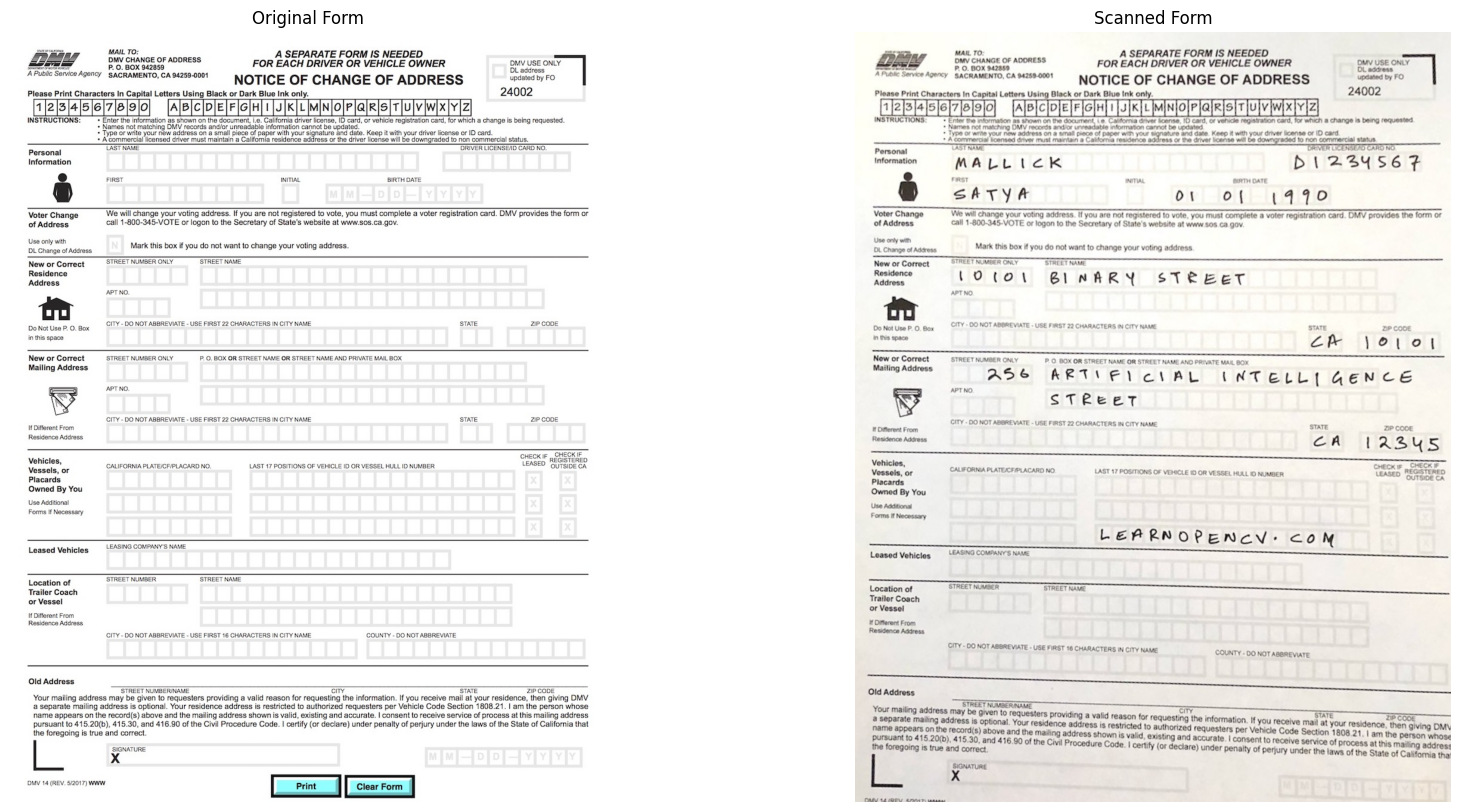

In [13]:
height, width, channels = refrence_img_rgb.shape
scan_img_reg = cv.warpPerspective(scan_image_rgb, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(refrence_img_rgb);plt.axis('off');plt.title("Original Form")
plt.subplot(122);plt.imshow(scan_img_reg);plt.axis('off');plt.title('Scanned Form');